# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2
print(x,'\n',y,'\n',z)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] 
 [  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198] 
 [   0    1    4    9   16   25   36   49   64   81  100  121  144  169
  196  225  256  289  324  361  400  441  484  529  576  625  676  729
  784  841  900  961 1024 1089 1156 1225 1296 1369 1444 1521 1600 1681
 1764 1849 1936 2025 2116 2209 2304 2401 2500 2601 2704 2809 2916 3025

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

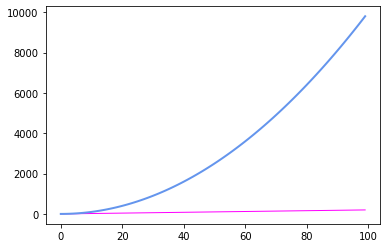

In [3]:
# Method 1

plt.plot(x, y, lw= 1 , color = 'magenta', label='linear')
plt.plot(x,z, lw=2 , color = 'cornflowerblue', label ='quadratic')



#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

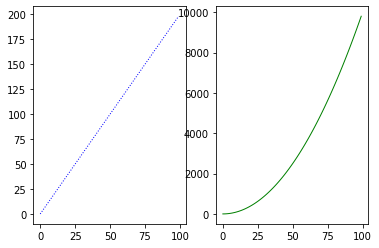

In [4]:
# Method 2

fig, ax = plt.subplots(nrows =1, ncols =2) #, sharex=True,sharey=True)

ax[0].plot(x, y, lw= 1, color = 'b' , ls=':', label='linear')
ax[1].plot(x,z, lw=1 , color = 'g', label ='quadratic')



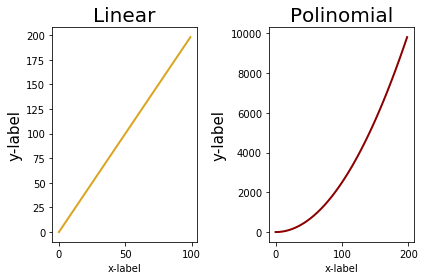

In [5]:
# Method 3 - My favourite so far

fig1, (ax1, ax2) = plt.subplots(1, 2) # equivalent to (nrows =1, ncols =2)

# Define axes and Title individually for each axe

ax1.set_xlabel('x-label', fontsize = 10)
ax1.set_ylabel('y-label', fontsize = 15)
ax1.set_title('Linear', fontsize = 20)

ax2.set_xlabel('x-label', fontsize = 10)
ax2.set_ylabel('y-label', fontsize = 15)
ax2.set_title('Polinomial', fontsize = 20)

# Define functions represented in each axe

ax1.plot(x, y, color= 'goldenrod', lw= 2)
ax2.plot(y, z, color= 'darkred', lw= 2)

# Automatically adjust space between axe titles, title and graphs. Quite handy

fig1.tight_layout()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

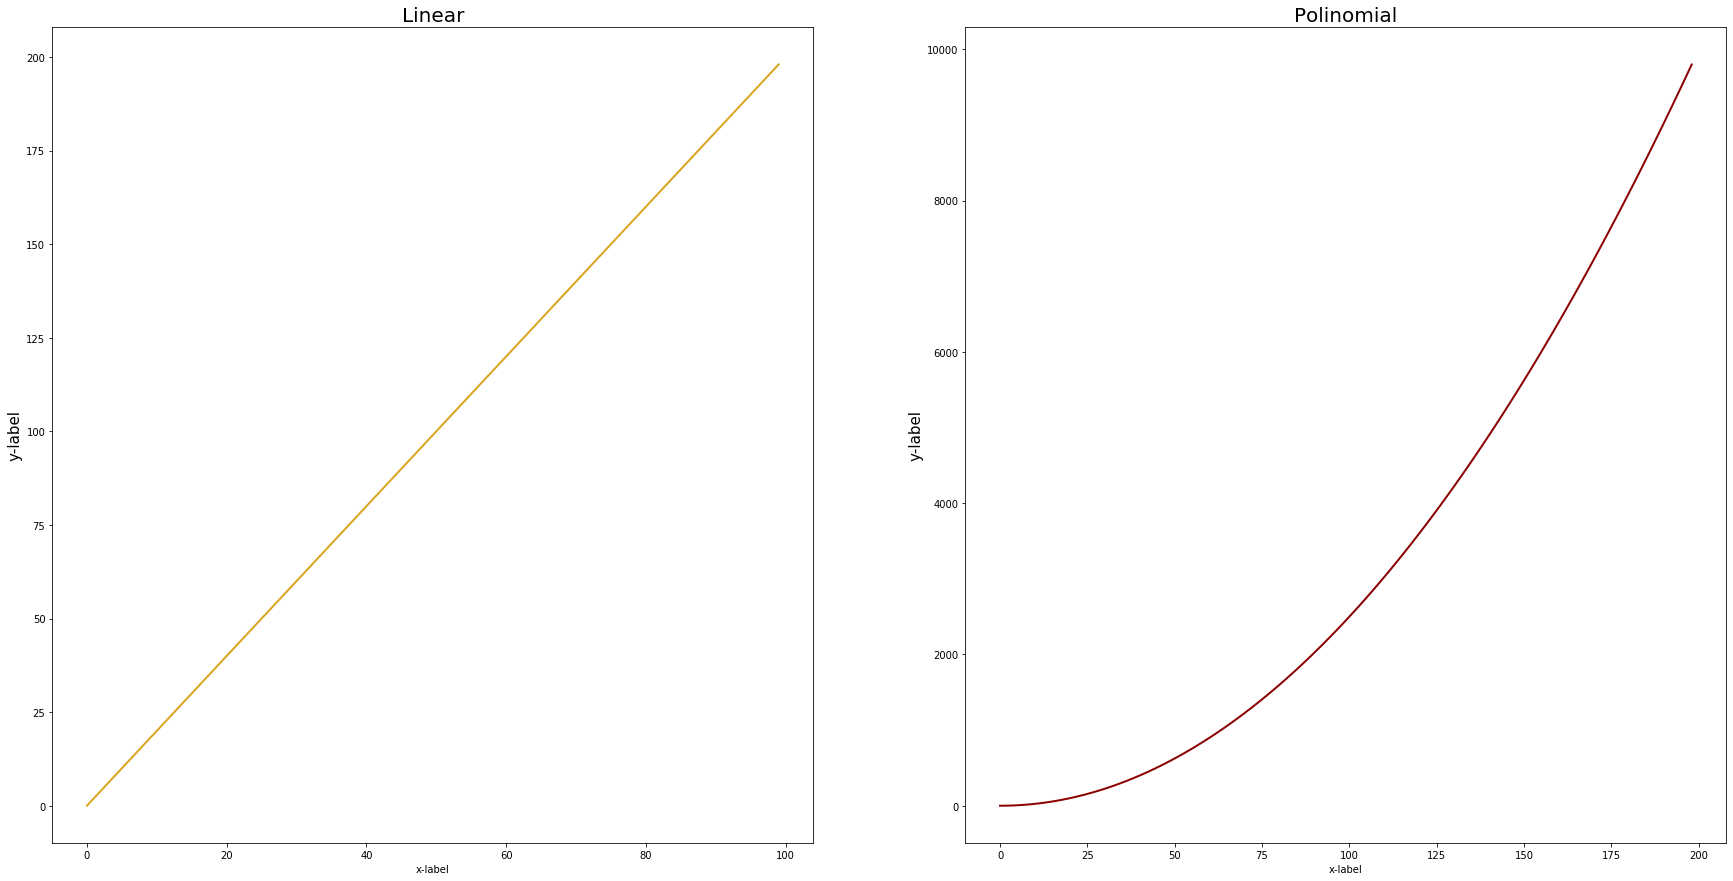

In [6]:
# your code here
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (30,15))

# Define axes and Title individually for each axe

ax1.set_xlabel('x-label', fontsize = 10)
ax1.set_ylabel('y-label', fontsize = 15)
ax1.set_title('Linear', fontsize = 20)

ax2.set_xlabel('x-label', fontsize = 10)
ax2.set_ylabel('y-label', fontsize = 15)
ax2.set_title('Polinomial', fontsize = 20)

# Define functions represented in each axe

ax1.plot(x, y, color= 'goldenrod', lw= 2)
ax2.plot(y, z, color= 'darkred', lw= 2)

# Automatically adjust space between axe titles, title and graphs. Quite handy

fig1.tight_layout()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

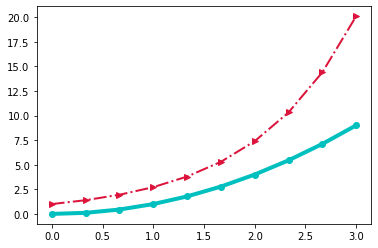

In [7]:
# your code here

x = np.linspace(0, 3, 10)
y1 = x**2
y2 = lambda a : np.exp(a)

plt.plot(x, y1, color = 'c', marker = 'o', lw = 4,
         ls = '-', label = 'x**2')
plt.plot(x,y2(x), color = 'crimson', marker= '>', lw = 2, 
         ls = '-.', label = 'e^x')


#### As a bonus challenge, try to add a legend to the plot.

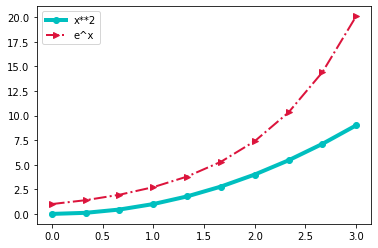

In [8]:
# your code here

x = np.linspace(0, 3, 10)
y1 = x**2
y2 = lambda a : np.exp(a)

plt.plot(x, y1, color = 'c', marker = 'o', lw = 4,
         ls = '-', label = 'x**2')
plt.plot(x,y2(x), color = 'crimson', marker= '>', lw = 2, 
         ls = '-.', label = 'e^x')

plt.legend() #  only when this bit of code is added, does the figure show the labels that we defined. 



## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
# your code here
ds = pd.read_csv('Fitbit2.csv')
ds.head() 

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [10]:
monthly_steps = ds.groupby('Months_encoded')['Steps'].median()

monthly_steps.head(12)

Months_encoded
1     10366.0
2      9235.0
3     11122.0
4     13846.5
5     11998.0
6     12935.5
7     10644.0
8     12213.0
9      9343.0
10     7865.0
11     9453.5
12     8531.0
Name: Steps, dtype: float64

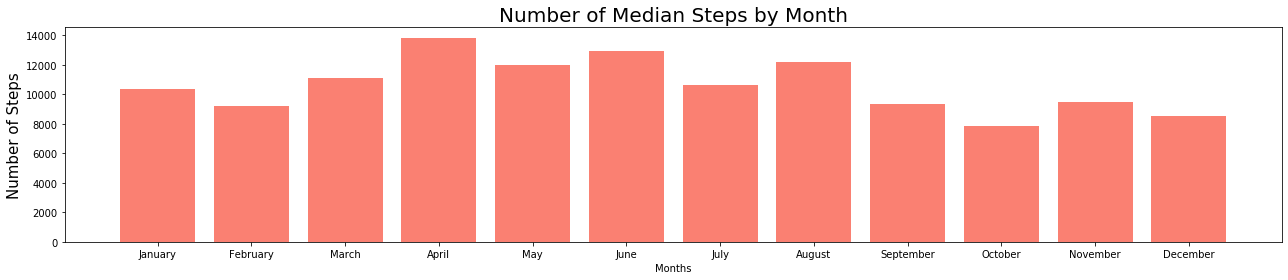

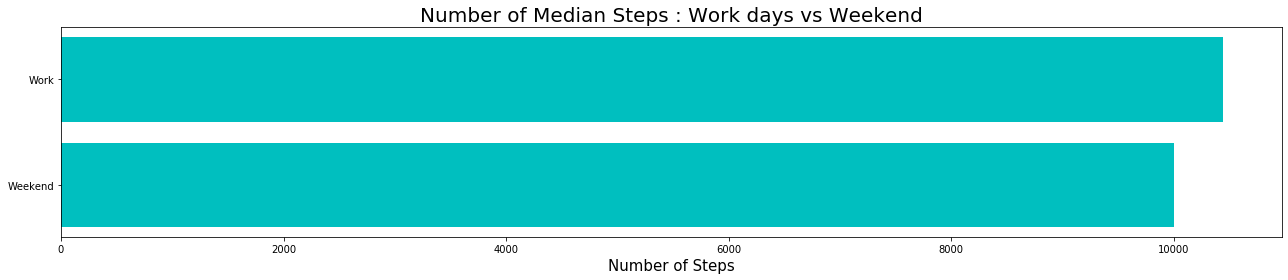

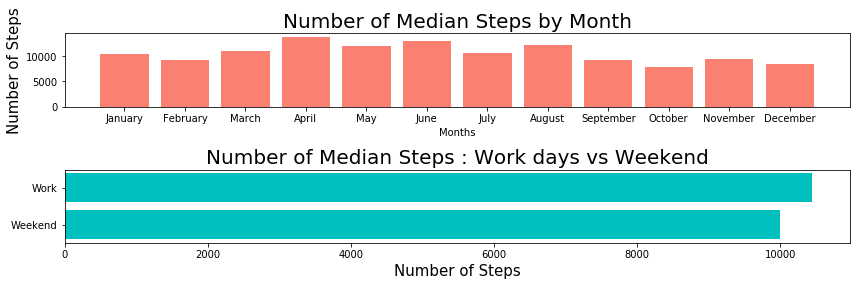

In [12]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

monthly_steps = ds.groupby('Months_encoded')['Steps'].median()

fig_2_1, ax1 = plt.subplots(1,1, figsize = (18,4))

ax1.set_xlabel('Months', fontsize = 10)
ax1.set_ylabel('Number of Steps', fontsize = 15)
ax1.set_title('Number of Median Steps by Month', fontsize = 20)

ax1.bar(monthly_steps.index, monthly_steps.values, color= 'salmon')
ax1.set_xticks(monthly_steps.index)
ax1.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'])

fig_2_1.tight_layout()

fig_2_1.savefig('figures/mothly_steps.png')
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

work_weekend = ds.groupby('Work_or_Weekend')['Steps'].median()

fig_2_2, ax2 = plt.subplots(1,1, figsize = (18,4))

ax2.set_xlabel('Number of Steps', fontsize = 15)
ax2.set_title('Number of Median Steps : Work days vs Weekend', fontsize = 20)

ax2.barh(work_weekend.index, work_weekend.values, color= 'c')
ax2.set_yticks(work_weekend.index)
ax2.set_yticklabels(['Weekend', 'Work'])

fig_2_2.tight_layout()

fig_2_2.savefig('figures/week_vs_weekend_steps.png')

fig_2_3, (ax3, ax4) = plt.subplots(2,1, figsize = (12,4))

ax3.set_xlabel('Months', fontsize = 10)
ax3.set_ylabel('Number of Steps', fontsize = 15)
ax3.set_title('Number of Median Steps by Month', fontsize = 20)

ax3.bar(monthly_steps.index, monthly_steps.values, color= 'salmon')
ax3.set_xticks(monthly_steps.index)
ax3.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'])

ax4.set_xlabel('Number of Steps', fontsize = 15)
ax4.set_title('Number of Median Steps : Work days vs Weekend', fontsize = 20)

ax4.barh(work_weekend.index, work_weekend.values, color= 'c')
ax4.set_yticks(work_weekend.index)
ax4.set_yticklabels(['Weekend', 'Work'])


fig_2_3.tight_layout()

fig_2_3.savefig('figures/mix_graph.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

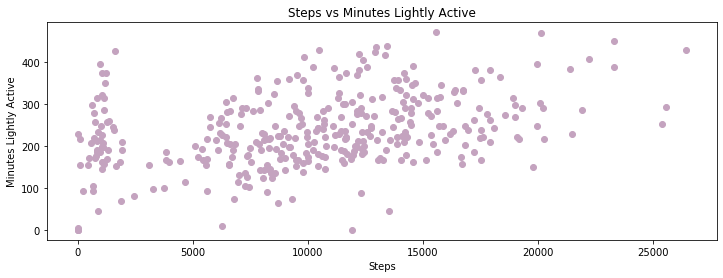

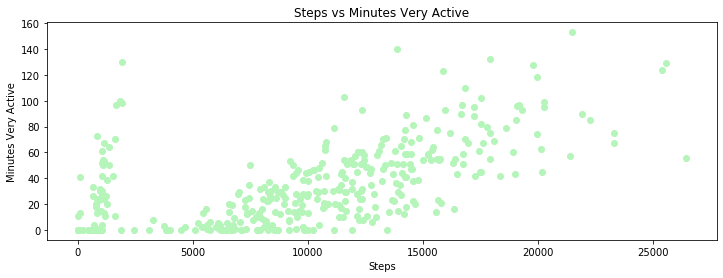

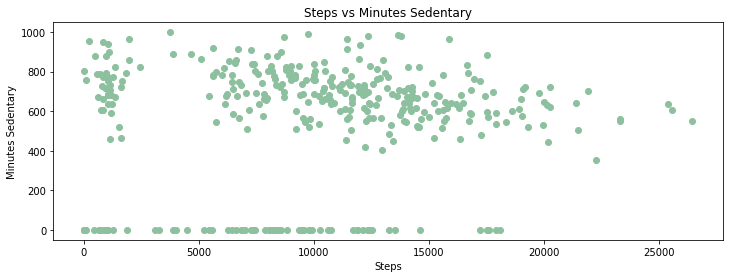

In [14]:
#your code here

measures = ['Minutes Lightly Active','Minutes Very Active', 'Minutes Sedentary']

for measure in measures : 
    plt.figure(figsize = (12,4))
    plt.title('Steps vs ' +measure)
    plt.xlabel('Steps')
    plt.ylabel(measure)
    plt.scatter(ds['Steps'], ds[measure], color= np.random.rand(len(measures),))
    plt.savefig(measure + '.png', dpi=600)  



## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [15]:
# your code here

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [16]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [17]:
# NUMERICAL VARIABLES
# your code here

numerical_variables = titanic.select_dtypes(['float64','int64'])
numerical_variables.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [18]:
# CATEGORICAL VARIABLES
# your code here

categorical_variables = titanic.select_dtypes('object') 
categorical_variables.head()
# I could / maybe I should drop 'Name'


,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [21]:
# your code here

import seaborn as sns

sns.set(style='white')



#### Use the right visulalization to show the distribution of column `Age`.

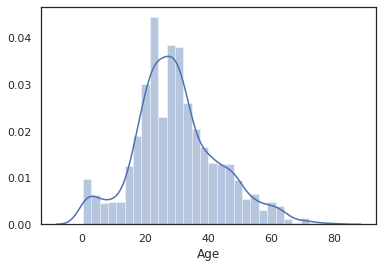

In [22]:
# your code here
sns.distplot(titanic['Age'])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

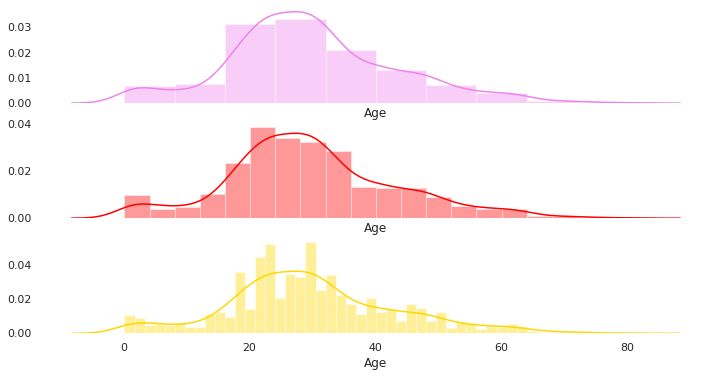

In [34]:
# your code here

figure, axes = plt.subplots(3,1, figsize = (12,6), sharex = True)
sns.despine(left = True, bottom = True)

#10 bins
sns.distplot(titanic['Age'], color = 'violet', ax = axes[0], bins = 10) # for colors: https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

#20 bins 
sns.distplot(titanic['Age'], color = 'red', ax = axes[1], bins = 20) 

#50 bins 
sns.distplot(titanic['Age'], color = 'gold', ax = axes[2], bins = 50) 



#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
"""

# it provides more detailed(more bins) or more macro information (less bins)

#### Use seaborn to show the distribution of column `Age`.

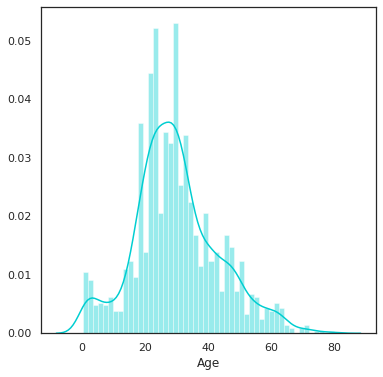

In [36]:
# your code here

figure, axes = plt.subplots(1,1, figsize = (6,6))
sns.distplot(titanic['Age'], color = 'darkturquoise', ax=axes, bins = 50)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

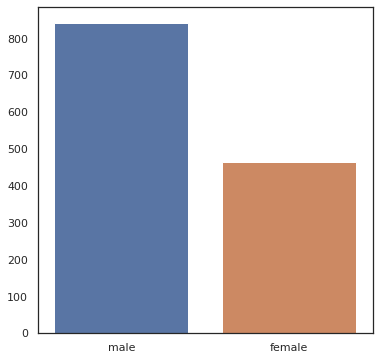

In [48]:
# Method 1 - matplotlib
# your code here
figure, axes = plt.subplots(1,1, figsize = (6,6))
sns.barplot(titanic['Gender'].value_counts().index, titanic['Gender'].value_counts().values, ax = axes)

([<matplotlib.patches.Wedge at 0x7f58913f0490>,
 [Text(-0.4488034046883865, -1.0042785987663545, 'Male'),
  Text(0.48960381678079956, 1.0955766073596467, 'Female')])

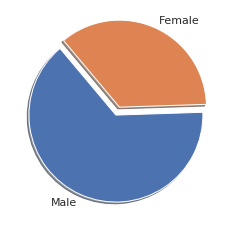

In [70]:
# Method 2 - seaborn
# your code here
plt.pie(titanic.Gender.value_counts(), labels= ['Male', 'Female'], explode = [0,0.1], shadow = True, startangle = 130)

#### Use the right plot to visualize the column `Pclass`.

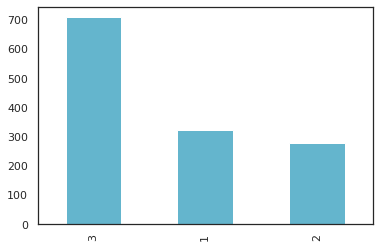

In [76]:
# your code here

titanic.Pclass.value_counts().plot.bar(color = 'c')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

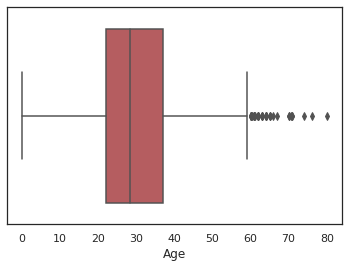

In [82]:
# your code here
sns.boxplot(titanic.Age, color = 'r')

In [ ]:
"""
your comments here
"""



#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

'''It tells me the minimum age, first quartile, median, 3rd quartile, maximum and outliers.'''

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

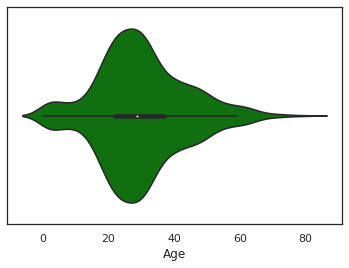

In [84]:
# your code here

sns.violinplot("Age", data = titanic, color = 'green')



#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here

This plot in addition to the summary statistics, also provides us with the distribution of age. 
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

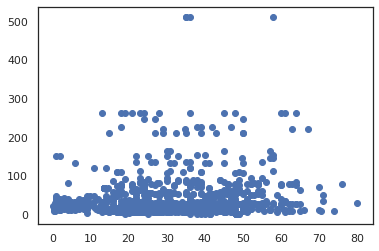

In [89]:
# Method 1 - matplotlib
# your code here

plt.scatter(titanic.Age, titanic.Fare)

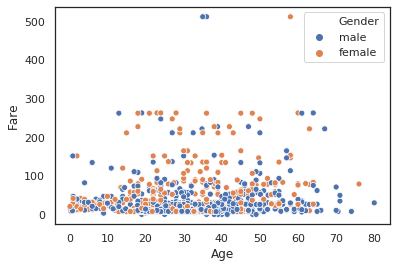

In [97]:
# Method 2 - seaborn
# your code here

sns.scatterplot(x= titanic.Age, y = titanic.Fare, hue = titanic.Gender)

#### Plot the correlation matrix using seaborn.

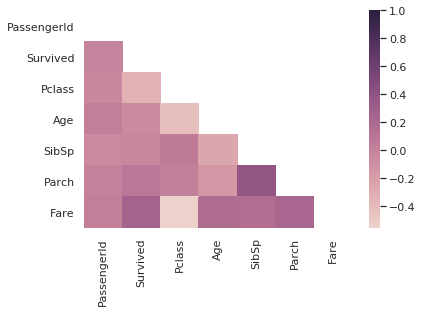

In [108]:
# your code here
corr_mat = titanic.corr()


# choosing colors
cmap = sns.cubehelix_palette(0, 15, as_cmap=True)
# making a mask to only show half the table cause its duplicated.
mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))

sns.heatmap(corr_mat, cmap = cmap , mask=mask)

#### What are the most correlated features?

In [ ]:
"""
your comments here

Parch / SibSp
Fare / Survived 

"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f588ee219d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f588ee15d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f588ee15d10>,
 'medians': [<matplotlib.lines.Line2D at 0x7f588ee28e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f588ee21f90>,
 'means': []}

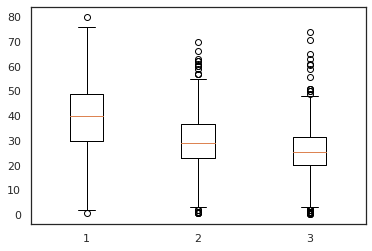

In [110]:
# your code here

plt.boxplot([titanic.loc[titanic['Pclass'] == 1, 'Age'], titanic.loc[titanic['Pclass'] == 2, 'Age'], titanic.loc[titanic['Pclass'] == 3, 'Age']])

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

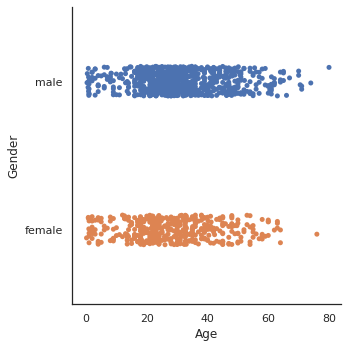

In [116]:
# your code here

sns.catplot(x="Age", y="Gender", data=titanic)


